In [11]:
import glob
fs=glob.glob("/Volumes/T7 Shield/SUBSETS/Subsets/2A-CS-CONUS*HDF5")
fs2=glob.glob("/Volumes/T7 Shield/SUBSETS/2A-CS-KuPR/2A-CS/2A-CS-CONUS*HDF5")
#print(fs)
fs=sorted(fs)
fs2=sorted(fs2)
print(fs[-1])
print(len(fs),len(fs2))
nt=len(fs2)
print(fs2[nt-1],fs[nt-1])

/Volumes/T7 Shield/SUBSETS/Subsets/2A-CS-CONUS.GPM.DPR.V9-20211125.20191021-S060735-E061606.032071.V07A.HDF5
653 652
/Volumes/T7 Shield/SUBSETS/2A-CS-KuPR/2A-CS/2A-CS-CONUS.GPM.Ku.V9-20211125.20190729-S234701-E235538.030776.V07A.HDF5 /Volumes/T7 Shield/SUBSETS/Subsets/2A-CS-CONUS.GPM.DPR.V9-20211125.20190729-S234701-E235538.030776.V07A.HDF5


In [12]:
fnameL=fs

# read netcdf file from aws archive using s3fs and netcdfdnx
    
import s3fs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [18]:
def readOrb(h5f):
    fh=h5f
    sfcPrecip=fh['FS/SLV/precipRateNearSurface'][:,:]
    precipRate=fh['FS/SLV/precipRate'][:,:]
    piaFinal=fh['FS/SLV/piaFinal'][:,:]
    lon=fh['FS/Longitude'][:,:]
    lat=fh['FS/Latitude'][:,:]
    hzero=fh['FS/VER/heightZeroDeg'][:,:]
    pType=fh['FS/CSF/typePrecip'][:,:]
    stormTop=fh['FS/PRE/heightStormTop'][:,:]
    sigmaZero=fh['FS/PRE/sigmaZeroMeasured'][:,:]
    landSurface=fh['FS/PRE/landSurfaceType'][:,:]
    elevation=fh['FS/PRE/elevation'][:,:]
    localZenithAngle=fh['FS/PRE/localZenithAngle'][:,:]
    pType=(pType/1e7).astype(np.int16)
    bzd=fh['FS/VER/binZeroDeg'][:,:]
    zku=fh['FS/PRE/zFactorMeasured'][:,:,:,0]
    zka=fh['FS/PRE/zFactorMeasured'][:,:,:,1]
    bcf=fh['FS/PRE/binClutterFreeBottom'][:,:]
    pathAtten=fh['FS/SRT/pathAtten'][:,:]
    PIAhyb=fh['FS/SRT/PIAhybrid'][:,:]
    reliabFlag=fh['FS/SRT/reliabFlag'][:,:]
    zeta_srt=fh['FS/SRT/zeta'][:,:]
    return sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,fh,piaFinal,lon,lat,sigmaZero,landSurface,elevation,localZenithAngle,pathAtten,PIAhyb,reliabFlag,zeta_srt

In [19]:
def readOrb2AKu(h5f):
    fh=h5f
    sfcPrecip=fh['FS/SLV/precipRateNearSurface'][:,:]
    piaFinal=fh['FS/SLV/piaFinal'][:,:]
    pathAtten=fh['FS/SRT/pathAtten'][:,:]
    PIAhyb=fh['FS/SRT/PIAhybrid'][:,:]
    reliabFlag=fh['FS/SRT/reliabFlag'][:,:]
    zeta_srt=fh['FS/SRT/zeta'][:,:]
    return sfcPrecip,piaFinal,pathAtten,PIAhyb,reliabFlag,zeta_srt

In [14]:
sfcPrecipL=[]
stormTopL=[]
dbzku_zeroL=[]
dbzku_iceL=[]
dbzku_rainL=[]
dbzka_zeroL=[]
hzeroL=[]
piaL=[]
pTypeL=[]
elevationL=[]
localZenithAngleL=[]
sigmaZeroL=[]
landSurfaceL=[]
pathAttenL=[]
PIAhybL=[]
reliabFlagL=[]
zetaL=[]
zeta_srtL=[]
sfcPrecipKuL=[]
piaKuL=[]
pathAttenKuL=[]
PIAhybKuL=[]
reliabFlagKuL=[]
def subSetData(sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,piaFinal,sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL,dnx=8):
    a=np.nonzero(pType>=1)
    b=np.nonzero(hzero[a]>=3000)
    nx=hzero.shape[0]
    
    for i,j in zip(a[0][b],a[1][b]):
        if j>=16 and j<33 and i>dnx and i<nx-dnx and pType[i,j]!=3:
            #print('here',bzd[i,j],bcf[i-4:i+4,j-4:j+4].min()-1)
            if bzd[i,j]+6>bcf[i-dnx:i+dnx,j-4:j+4].min()-1:
                continue
            sfcPrecipL.append(sfcPrecip[i-dnx:i+dnx,j-4:j+4])
            stormTopL.append(stormTop[i-dnx:i+dnx,j-4:j+4])
            dbzku_zeroL.append(zku[i-dnx:i+dnx,j-4:j+4,bzd[i,j]])
            dbzku_iceL.append(zku[i-dnx:i+dnx,j-4:j+4,bzd[i,j]-6])
            dbzku_rainL.append(zku[i-dnx:i+dnx,j-4:j+4,bzd[i,j]+6])
            dbzka_zeroL.append(zka[i-dnx:i+dnx,j-4:j+4,bzd[i,j]])
            hzeroL.append(hzero[i-dnx:i+dnx,j-4:j+4])
            piaL.append(piaFinal[i-dnx:i+dnx,j-4:j+4])
            pTypeL.append(pType[i-dnx:i+dnx,j-4:j+4])
            elevationL.append(elevation[i-dnx:i+dnx,j-4:j+4])
            localZenithAngleL.append(localZenithAngle[i-dnx:i+dnx,j-4:j+4])
            sigmaZeroL.append(sigmaZero[i-dnx:i+dnx,j-4:j+4])
            landSurfaceL.append(landSurface[i-dnx:i+dnx,j-4:j+4])
            pathAttenL.append(pathAtten[i-dnx:i+dnx,j-4:j+4])
            PIAhybL.append(PIAhyb[i-dnx:i+dnx,j-4:j+4])
            reliabFlagL.append(reliabFlag[i-dnx:i+dnx,j-4:j+4])
            zetaL.append(zeta[i-dnx:i+dnx,j-4:j+4])
            zeta_srtL.append(zeta_srt[i-dnx:i+dnx,j-4:j+4])
            sfcPrecipKuL.append(sfcPrecipKu[i-dnx:i+dnx,j-4:j+4])
            piaKuL.append(piaFinalKu[i-dnx:i+dnx,j-4:j+4])
            pathAttenKuL.append(pathAttenKu[i-dnx:i+dnx,j-4:j+4])
            PIAhybKuL.append(PIAhybKu[i-dnx:i+dnx,j-4:j+4])
            reliabFlagKuL.append(reliabFlagKu[i-dnx:i+dnx,j-4:j+4])
    return sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL

In [15]:
def saveData(sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL,fnameout):
    sfcPrecipX=xr.DataArray(sfcPrecipL)
    stormTopX=xr.DataArray(stormTopL)
    dbzku_zeroX=xr.DataArray(dbzku_zeroL)
    dbzku_iceX=xr.DataArray(dbzku_iceL)
    dbzku_rainX=xr.DataArray(dbzku_rainL)
    dbzka_zeroX=xr.DataArray(dbzka_zeroL)
    hzeroX=xr.DataArray(hzeroL)
    piaX=xr.DataArray(piaL)
    pTypeX=xr.DataArray(pTypeL)
    localZenithAngleX=xr.DataArray(localZenithAngleL)
    sigmaZeroX=xr.DataArray(sigmaZeroL)
    landSurfaceX=xr.DataArray(landSurfaceL)
    elevationX=xr.DataArray(elevationL)
    pathAttenX=xr.DataArray(pathAttenL)
    PIAhybX=xr.DataArray(PIAhybL)
    reliabFlagX=xr.DataArray(reliabFlagL)
    zetaX=xr.DataArray(zetaL)
    zeta_srtX=xr.DataArray(zeta_srtL)
    sfcPrecipKuX=xr.DataArray(sfcPrecipKuL)
    piaKuX=xr.DataArray(piaKuL)
    pathAttenKuX=xr.DataArray(pathAttenKuL)
    PIAhybKuX=xr.DataArray(PIAhybKuL)
    reliabFlagKuX=xr.DataArray(reliabFlagKuL)
    ds=xr.Dataset({'sfcPrecip':sfcPrecipX,'stormTop':stormTopX,'dbzku_zero':dbzku_zeroX,'dbzku_ice':dbzku_iceX,'dbzku_rain':dbzku_rainX,'dbzka_zero':dbzka_zeroX,'hzero':hzeroX,'pia':piaX,'pType':pTypeX,'localZenithAngle':localZenithAngleX,'sigmaZero':sigmaZeroX,'landSurface':landSurfaceX,'elevation':elevationX,'pathAtten':pathAttenX,'PIAhyb':PIAhybX,'reliabFlag':reliabFlagX,'zeta':zetaX,'zeta_srt':zeta_srtX,'sfcPrecipKu':sfcPrecipKuX,'piaKu':piaKuX,'pathAttenKu':pathAttenKuX,'PIAhybKu':PIAhybKuX,'reliabFlagKu':reliabFlagKuX})
    ds.to_netcdf(fnameout,encoding={'sfcPrecip': {'zlib': True, 'complevel': 5},'stormTop': {'zlib': True, 'complevel': 5},'dbzku_zero': {'zlib': True, 'complevel': 5},'dbzku_ice': {'zlib': True, 'complevel': 5},'dbzku_rain': {'zlib': True, 'complevel': 5},'dbzka_zero': {'zlib': True, 'complevel': 5},'hzero': {'zlib': True, 'complevel': 5},'pia': {'zlib': True, 'complevel': 5},'pType': {'zlib': True, 'complevel': 5},'localZenithAngle': {'zlib': True, 'complevel': 5},'sigmaZero': {'zlib': True, 'complevel': 5},'landSurface': {'zlib': True, 'complevel': 5},'elevation': {'zlib': True, 'complevel': 5},'pathAtten': {'zlib': True, 'complevel': 5},'PIAhyb': {'zlib': True, 'complevel': 5},'reliabFlag': {'zlib': True, 'complevel': 5},'zeta': {'zlib': True, 'complevel': 5},'zeta_srt': {'zlib': True, 'complevel': 5},'sfcPrecipKu': {'zlib': True, 'complevel': 5},'piaKu': {'zlib': True, 'complevel': 5},'pathAttenKu': {'zlib': True, 'complevel': 5},'PIAhybKu': {'zlib': True, 'complevel': 5},'reliabFlagKu': {'zlib': True, 'complevel': 5}})

In [34]:
import netCDF4
import h5py
s3 = s3fs.S3FileSystem(anon=False)
lastwrite=0
iwrite=0
from zetaMod import *
dr=0.125
for i,fname in enumerate(fnameL[:652]):
    h5f = h5py.File(fname, 'r')
    print(fname.split("/")[-1],h5f.keys())
    sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,fh,piaFinal,lon,lat,sigmaZero,landSurface,elevation,localZenithAngle,pathAtten,PIAhyb,reliabFlag,zeta_srt=readOrb(h5f)
    h5f=h5py.File(fs2[i],'r')
    sfcPrecipKu,piaFinalKu,pathAttenKu,PIAhybKu,reliabFlagKu,zeta_srtKu=readOrb2AKu(h5f)
    zeta = calc_zeta(zku,bzd,bcf,pType,dr)
    sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL=subSetData(sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,piaFinal,sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL)
    print(len(sfcPrecipL))
    if len(sfcPrecipL)-lastwrite>5000:
        fnameout="trainingSubset%4.4i.nc"%iwrite
        saveData(sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,elevationL,localZenithAngleL,sigmaZeroL,landSurfaceL,pathAttenL,PIAhybL,reliabFlagL,zetaL,zeta_srtL,sfcPrecipKuL,piaKuL,pathAttenKuL,PIAhybKuL,reliabFlagKuL,fnameout)
        print('saved',fnameout)
        lastwrite=len(sfcPrecipL)
        iwrite+=1
    #break        


2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S011631-E012509.029377.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
66
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S025200-E025742.029378.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
66
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S075135-E075444.029381.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
66
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S092409-E093249.029382.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
988
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S105642-E110522.029383.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
988
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S123559-E123755.029384.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
988
2A-CS-CONUS.GPM.DPR.V9-20211125.20190501-S225229-E225821.029391.V07A.HDF5 <KeysViewHDF5 ['AlgorithmRuntimeInfo', 'FS', 'HS']>
1480
2A-CS-CONUS.GPM.DPR.V9-20211125.20190502-S002504-E003342.029392.V07A.HDF5 <KeysViewHDF5 ['Al

[[1.         0.91433791]
 [0.91433791 1.        ]]
[[1.        0.4829696]
 [0.4829696 1.       ]]


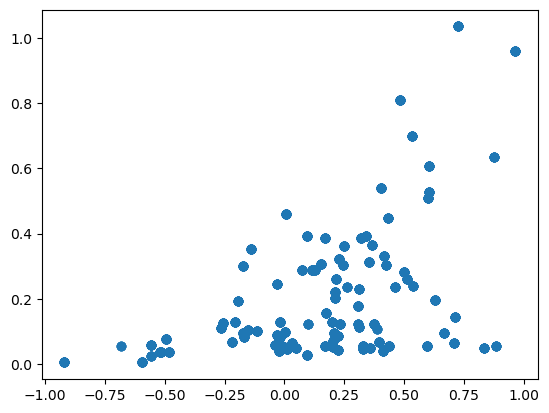

In [33]:
a=np.nonzero(np.array(pTypeL)>0)
b=np.nonzero(np.array(PIAhybKuL)[a]>-1)
print(np.corrcoef(np.array(sfcPrecipKuL)[a],np.array(sfcPrecipL)[:,:,:][a]))
plt.scatter(np.array(PIAhybKuL)[a][b],np.array(PIAhybL)[:,:,:,0][a][b])
print(np.corrcoef(np.array(PIAhybKuL)[a][b],np.array(PIAhybL)[:,:,:,0][a][b]))



(741, 49, 2)
[[1.         0.31342675]
 [0.31342675 1.        ]]
-9999.9
(741, 49)
(741, 49, 2)


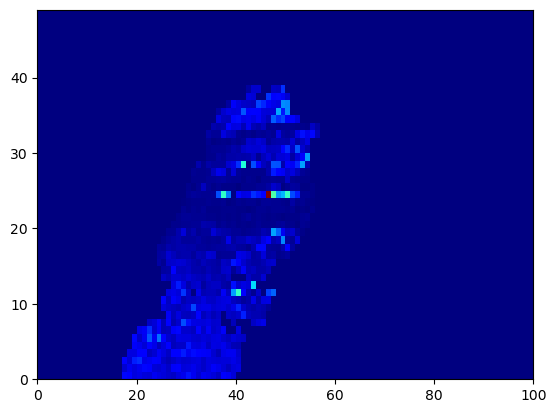

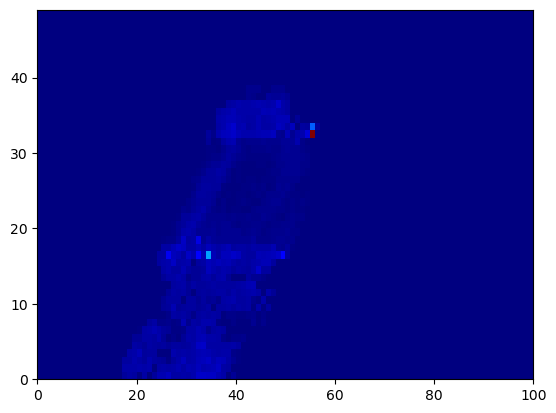

In [15]:
zeta_srt=h5f['FS/SRT/zeta'][:,:]
print(zeta_srt.shape)
a=np.nonzero(zeta_srt[:,:,0]>0)
print(np.corrcoef(zeta[a].flatten(),zeta_srt[:,:,0][a].flatten()))
print(zeta_srt.min())
import matplotlib.pyplot as plt
plt.pcolormesh(zeta[600:700,:].T,vmin=0,cmap='jet')
plt.figure()
plt.pcolormesh(piaFinal[600:700,:,0].T,vmin=0,cmap='jet')
print(zeta.shape)
print(zeta_srt.shape)


In [39]:
print(h5f['FS/SRT'].keys())

<KeysViewHDF5 ['pathAtten', 'PIAalt', 'PIAdw', 'PIAhb', 'PIAhybrid', 'piaExp', 'PIAweight', 'PIAweightHY', 'refScanID', 'reliabFactor', 'RFactorAlt', 'reliabFactorHY', 'reliabFlag', 'reliabFlagHY', 'stddevEff', 'stddevHY', 'zeta']>


In [52]:
print(len(sfcPrecipL))
fnameout="trainingSubset%4.4i.nc"%iwrite
saveData(sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL,pTypeL,fnameout)

959


In [32]:
sfcPrecipL=[]
stormTopL=[]
dbzku_zeroL=[]
dbzku_iceL=[]
dbzku_rainL=[]
dbzka_zeroL=[]
hzeroL=[]
piaL=[]

def subSetData(sfcPrecip,hzero,pType,stormTop,bzd,zku,zka,bcf,precipRate,piaFinal):
    a=np.nonzero(pType>=1)
    b=np.nonzero(hzero[a]>=3000)
    nx=hzero.shape[0]
    
    for i,j in zip(a[0][b],a[1][b]):
        if j>=16 and j<33 and i>4 and i<nx-4 and pType[i,j]!=3:
            if(bzd[i,j]+6>bcf[i-4:i+4,j-4:j+4]).min()-1:
                continue
            sfcPrecipL.append(sfcPrecip[i-4:i+4,j-4:j+4])
            stormTopL.append(stormTop[i-4:i+4,j-4:j+4])
            dbzku_zeroL.append(zku[i-4:i+4,j-4:j+4,bzd[i,j]])
            dbzku_iceL.append(zku[i-4:i+4,j-4:j+4,bzd[i,j]-6])
            dbzku_rainL.append(zku[i-4:i+4,j-4:j+4,bzd[i,j]+6])
            dbzka_zeroL.append(zka[i-4:i+4,j-4:j+4,bzd[i,j]])
            hzeroL.append(hzero[i-4:i+4,j-4:j+4])
            piaL.append(piaFinal[i-4:i+4,j-4:j+4])
    return sfcPrecipL,stormTopL,dbzku_zeroL,dbzku_iceL,dbzku_rainL,dbzka_zeroL,hzeroL,piaL
